In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
proj_data = pd.read_csv("ufo_elect_data_v2.csv")
pres_data = pd.read_csv("president-1976-2016.csv")
proj_data.head()

,Unnamed: 0,date,time,last_election_year,city,state_x,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,candidate,party,candidatevotes,totalvotes,comments_array
0,0,10/10/49,20:30,1948.0,san marcos,TX,cylinder,2700.0,45 minutes,this event took place in early fall around it...,4/27/04,29.883056,-97.941111,NaN,NaN,NaN,NaN,"['this', 'event', 'took', 'place', 'in', 'earl..."
1,1,10/10/56,21:00,1956.0,edna,TX,circle,20.0,1/2 hour,my older brother and twin sister were leaving ...,1/17/04,28.978333,-96.645833,NaN,NaN,NaN,NaN,"['my', 'older', 'brother', 'and', 'twin', 'sis..."
2,2,10/15/57,20:30,1956.0,houston (ellington afb),TX,light,3.0,3 seconds,to quot diameter light extremely fast silent ...,9/17/00,29.763056,-95.363056,NaN,NaN,NaN,NaN,"['to', 'quot', 'diameter', 'light', 'extremely..."
3,3,11/10/57,19:00,1956.0,corpus christi,TX,light,600.0,10 minutes,ufo over corpus christi near naval yard on nov...,10/31/03,27.800278,-97.396111,NaN,NaN,NaN,NaN,"['ufo', 'over', 'corpus', 'christi', 'near', '..."
4,4,1/1/57,21:00,1956.0,dallas,TX,unknown,20.0,20 seconds,i was flying the first of usaf aircraft on a ...,8/24/04,32.783333,-96.800000,NaN,NaN,NaN,NaN,"['i', 'was', 'flying', 'the', 'first', 'of', '..."


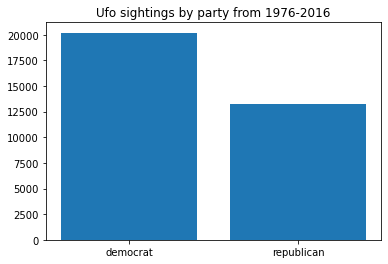

In [3]:
#How many sightings happened in a city and state the voted for a democrat or republican? 
rep_count = proj_data.loc[proj_data['party'] == 'republican']
dem_count = proj_data.loc[proj_data['party'] == 'democrat']
plt.bar(x=['democrat', 'republican'],height=[dem_count['party'].count(), rep_count['party'].count()])
plt.title('Ufo sightings by party from 1976-2016')
plt.show()

In [4]:
###### Scatter plot of ufo sightings per per year and party
election_years = [1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012]

dem_ufo_sightings = []
rep_ufo_sightings = []

for i in election_years: 
    temp = dem_count.loc[dem_count['last_election_year'] == i]
    temp2 = rep_count.loc[rep_count['last_election_year'] == i]
    dem_ufo_sightings.append(temp['last_election_year'].count())
    rep_ufo_sightings.append(temp2['last_election_year'].count())
    



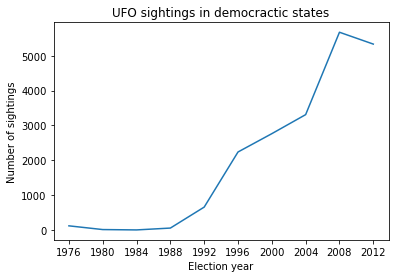

In [5]:
plt.plot(election_years, dem_ufo_sightings)
plt.title('UFO sightings in democractic states')
plt.xticks(election_years)
plt.ylabel('Number of sightings')
plt.xlabel('Election year')
plt.show()

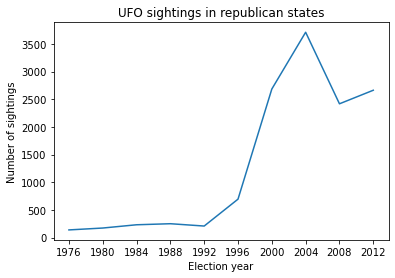

In [6]:
plt.plot(election_years, rep_ufo_sightings)
plt.title('UFO sightings in republican states')
plt.xticks(election_years)
plt.ylabel('Number of sightings')
plt.xlabel('Election year')
plt.show()

In [7]:
#Plot number of ufo sightings with party votes that year

dem_votes = pres_data.loc[pres_data['party'] == 'democrat']
rep_votes = pres_data.loc[pres_data['party'] == 'republican']

dem_votes_year = []
rep_votes_year = []

for i in election_years: 
    temp = dem_votes.loc[dem_votes['year'] == i]
    temp2 = rep_votes.loc[rep_votes['year'] == i]
    dem_votes_year.append(temp['candidatevotes'].sum())
    rep_votes_year.append(temp2['candidatevotes'].sum())
    


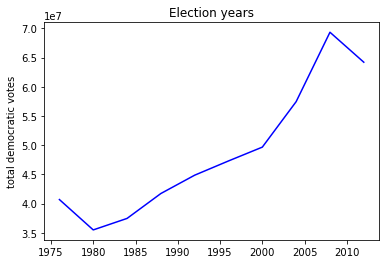

In [8]:
plt.plot( election_years, dem_votes_year,  'b')
#plt.plot(election_years, dem_votes_year, 'g')
plt.title('Election years')

plt.ylabel('total democratic votes')
#plt.xlabel('Election year')
plt.show()

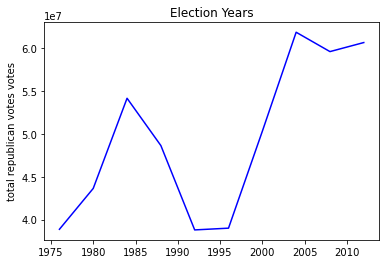

In [9]:
plt.plot( election_years, rep_votes_year, 'b')
#plt.plot(election_years, dem_votes_year, 'g')
plt.title('Election Years')

plt.ylabel('total republican votes votes')
#plt.xlabel('Election year')
plt.show()

Pearson coeefficient - increase in ufo sightings and voter turnout
lift
effect of presidential terms
density/heatmap of voter turnout and ufo sighting increases - by year.


In [10]:
#Average UFO sighting time
dem_time = proj_data.loc[proj_data['party'] == 'democrat']
rep_time = proj_data.loc[proj_data['party'] == 'republican']

dem_time_year = []
rep_time_year = []

for i in election_years: 
    temp = dem_time.loc[dem_time['last_election_year'] == i]
    temp2 = rep_time.loc[rep_time['last_election_year'] == i]
    temp = temp['duration (seconds)'].astype(float)
    temp2 = temp2['duration (seconds)'].astype(float)
    dem_time_year.append(temp.mean()/60)
    rep_time_year.append(temp2.mean()/60)

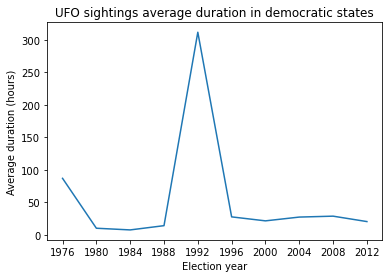

In [11]:
plt.plot(election_years, dem_time_year)
plt.title('UFO sightings average duration in democratic states')
plt.xticks(election_years)
plt.ylabel('Average duration (hours)')
plt.xlabel('Election year')
plt.show()

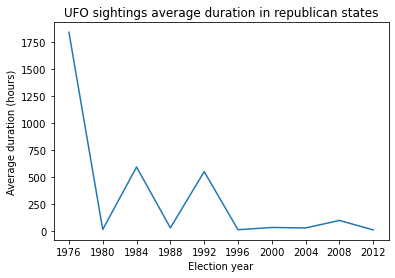

In [12]:
plt.plot(election_years, rep_time_year)
plt.title('UFO sightings average duration in republican states')
plt.xticks(election_years)
plt.ylabel('Average duration (hours)')
plt.xlabel('Election year')
plt.show()

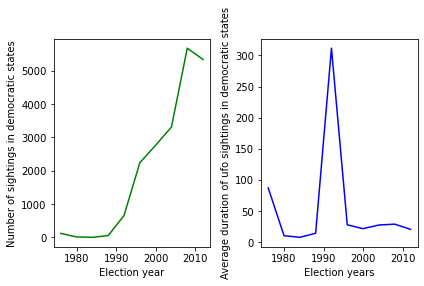

In [13]:
plt.subplot(1, 2, 1)
plt.plot(election_years, dem_ufo_sightings, color='g')
plt.ylabel('Number of sightings in democratic states')
plt.xlabel('Election year')
plt.subplot(1, 2, 2)
plt.plot( election_years, dem_time_year,  'b')
plt.xlabel('Election years')
plt.ylabel('Average duration of ufo sightings in democratic states')
plt.tight_layout()

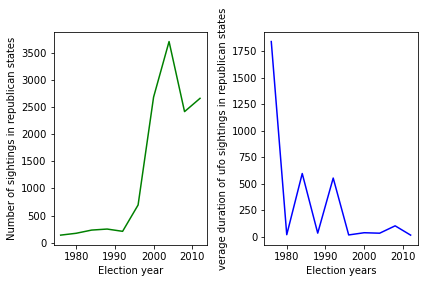

In [14]:
plt.subplot(1, 2, 1)
plt.plot(election_years, rep_ufo_sightings, color='g')
plt.ylabel('Number of sightings in republican states')
plt.xlabel('Election year')
plt.subplot(1, 2, 2)
plt.plot( election_years, rep_time_year,  'b')
plt.xlabel('Election years')
plt.ylabel('verage duration of ufo sightings in republican states')
plt.tight_layout()

In [23]:
#Pearson's correlation coefficient
proj_dict = {'election_years' : election_years, 'dem_votes_year': dem_votes_year, 'rep_votes_year' : rep_votes_year, 'dem_ufo_sightings' : dem_ufo_sightings, 'rep_ufo_sightings' : rep_ufo_sightings, 'dem_time_year' : dem_time_year, 'rep_time_year' : rep_time_year}
pear_df = pd.DataFrame.from_dict(proj_dict)

pear_df.corr(method='pearson')

,election_years,dem_votes_year,rep_votes_year,dem_ufo_sightings,rep_ufo_sightings,dem_time_year,rep_time_year
election_years,1.000000,0.923465,0.695396,0.935860,0.843115,-0.125038,-0.608772
dem_votes_year,0.923465,1.000000,0.694626,0.975797,0.809245,-0.120176,-0.366542
rep_votes_year,0.695396,0.694626,1.000000,0.687736,0.781332,-0.483529,-0.446459
dem_ufo_sightings,0.935860,0.975797,0.687736,1.000000,0.826678,-0.228438,-0.438671
rep_ufo_sightings,0.843115,0.809245,0.781332,0.826678,1.000000,-0.299684,-0.448843
dem_time_year,-0.125038,-0.120176,-0.483529,-0.228438,-0.299684,1.000000,0.336700
rep_time_year,-0.608772,-0.366542,-0.446459,-0.438671,-0.448843,0.336700,1.000000
